In [65]:
# Necessary imports
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load data from checkpoint file
with open('checkpoint.json', 'r') as file:
    data = json.load(file)

# Define range of thresholds to evaluate
thresholds = np.arange(0.0, 1.0, 0.01)

# List to store metrics
metrics = []

# Iterate over each threshold
for threshold in thresholds:
    correct_predictions_jaccard = 0
    correct_predictions_cosine = 0
    
    for item in data["data"]:
        if item["similarity_score_jaccard"] >= threshold:
            correct_predictions_jaccard += 1
        if item["similarity_score_cosine"] >= threshold:
            correct_predictions_cosine += 1
    
    total_questions = len(data["data"])
    accuracy_jaccard = correct_predictions_jaccard / total_questions
    accuracy_cosine = correct_predictions_cosine / total_questions
    
    # Store metrics for each threshold
    metrics.append({
        'Threshold': threshold, 
        'Jaccard Accuracy': accuracy_jaccard, 
        'Cosine Accuracy': accuracy_cosine
    })

# Convert metrics into pandas dataframe
df_metrics = pd.DataFrame(metrics)

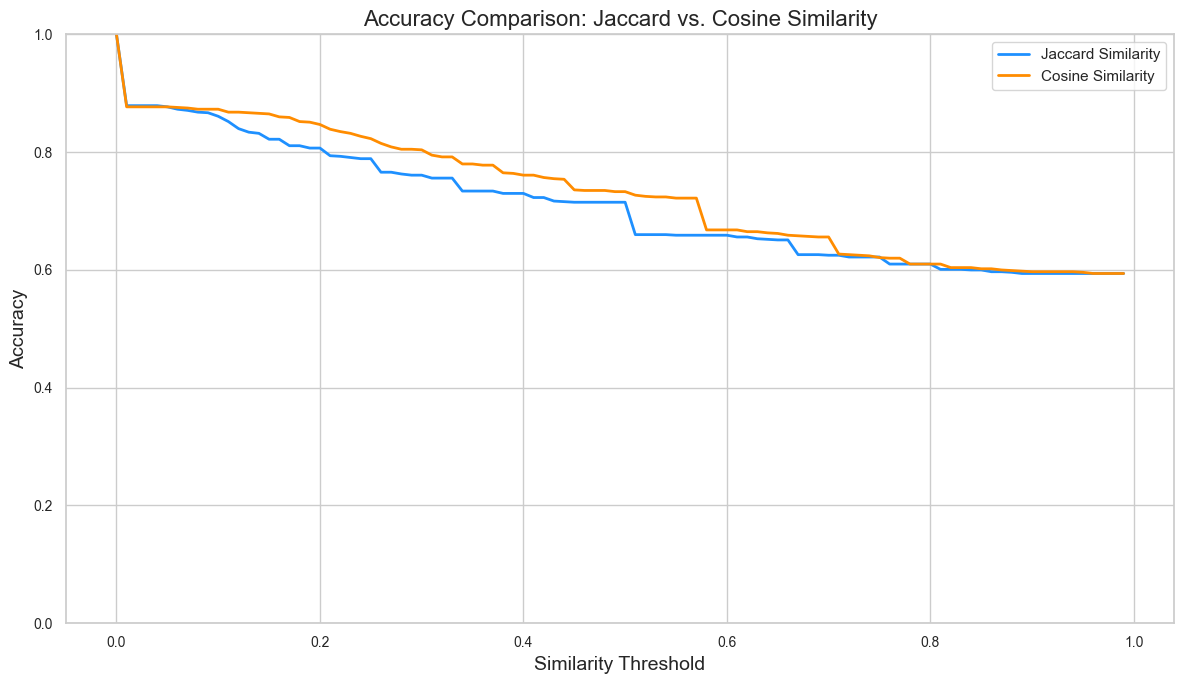

In [68]:
# Visual theme
sns.set_theme(style="whitegrid")

# Size of figure
plt.figure(figsize=(12, 7))

# Plot accuracy for Jaccard and Cosine
sns.lineplot(x='Threshold', y='Jaccard Accuracy', data=df_metrics, label='Jaccard Similarity', color='dodgerblue', lw=2)
sns.lineplot(x='Threshold', y='Cosine Accuracy', data=df_metrics, label='Cosine Similarity', color='darkorange', lw=2)

# Labels, title, and legend
plt.xlabel('Similarity Threshold', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison: Jaccard vs. Cosine Similarity', fontsize=16)
plt.legend()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.ylim(0, 1)

plt.tight_layout()

# Save plot to local file
plt.savefig('jaccard_vs_cosine_accuracy.png', dpi=300)

# Display plot
plt.show()